
#  Statistics & Data Analysis


##  Req

#### Import Requirements

##### HTML formatting

In [154]:
from IPython.display import HTML

HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
  }
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
    line-height: normal;
  }
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
    line-height: normal;
    padding: 0.3em 0.5em;
  }
</style>
""")

In [155]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from plotnine import *
from scipy.stats import *
import scikit_posthocs   as sp



data = pd.read_csv("./NewCols.csv")



## Calculating the differences between the noremalized values. 

In [156]:
data_control = data[data["treatment"] == "baseline"]
data_control.to_csv("./control.csv")
data_treatment = data[data["treatment"] == "intravenous LPS"]
data_control.to_csv("./lps.csv")

procData = data_treatment


procData['diff_AVAR2'] = (
    np.array(data_treatment["AVAR2"]) - np.array(data_control["AVAR2"])).tolist()
procData["diff_CVAR2"] = (
    np.array(data_treatment["CVAR2"]) - np.array(data_control["CVAR2"])).tolist()
procData["diff_AWT2"] = (np.array(data_treatment["AWT2"]) -
                         np.array(data_control["AWT2"])).tolist()
procData["diff_CWT2"] = (np.array(data_treatment["CWT2"]) -
                         np.array(data_control["CWT2"])).tolist()


procData["diff_total2"] = (
    np.array(data_treatment["total2"]) - np.array(data_control["total2"])).tolist()
procData["diff_totalA"] = (
    np.array(data_treatment["totalA"]) - np.array(data_control["totalA"])).tolist()
procData["diff_totalC"] = (
    np.array(data_treatment["totalC"]) - np.array(data_control["totalC"])).tolist()
procData["diff_totalWT"] = (np.array(
    data_treatment["totalWT"]) - np.array(data_control["totalWT"])).tolist()
procData["diff_totalVar"] = (np.array(
    data_treatment["totalVar"]) - np.array(data_control["totalVar"])).tolist()

procData.to_csv("./procData.csv")

<ipython-input-156-f984afccbdb6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-f984afccbdb6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-f984afccbdb6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-f984afc

In [157]:
newDF=  data_control[["testGroup","tg2"]]
newDF


,testGroup,tg2
0,A-Var/C-Var,A-Var/C-Var
1,A-Var/C-Var,A-Var/C-Var
2,AWT,AWT
3,error,Error
4,AWT,AWT
5,error,Error
6,A-Var/C-Var,A-Var/C-Var
7,error,Error
8,A-WT/C-WT,A-WT/C-WT
9,error,Error


In [158]:
newDF.rename(columns = {'testGroup':'c_tg','tg2':'c_tg2'},  inplace=True) 
newDF


/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,c_tg,c_tg2
0,A-Var/C-Var,A-Var/C-Var
1,A-Var/C-Var,A-Var/C-Var
2,AWT,AWT
3,error,Error
4,AWT,AWT
5,error,Error
6,A-Var/C-Var,A-Var/C-Var
7,error,Error
8,A-WT/C-WT,A-WT/C-WT
9,error,Error


In [159]:
newDF.index = procData.index
procData= pd.concat([procData,newDF], axis=1)


#### Difference Table


In [160]:

pd.set_option('display.max_rows', procData.shape[0]+1)

diff_data = procData.loc[ :,"diff_AVAR2":"diff_totalVar" ]
diff_data.to_csv("./diffData.csv")

In [161]:
diff_data.describe()

,diff_AVAR2,diff_CVAR2,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-0.695333,-0.043333,-0.630667,0.020000,-1.349333,-1.326000,-0.023333,-0.610667,-0.738667
std,2.089395,0.144502,0.835357,0.084769,2.165016,2.067199,0.170992,0.762978,2.218925
min,-7.700000,-0.520000,-2.970000,-0.070000,-8.220000,-7.700000,-0.520000,-2.670000,-8.220000
25%,-0.290000,-0.055000,-0.840000,-0.010000,-1.660000,-1.705000,-0.080000,-0.870000,-0.270000
50%,0.000000,0.000000,-0.410000,0.000000,-0.780000,-0.800000,0.000000,-0.430000,0.000000
75%,0.000000,0.000000,0.000000,0.020000,-0.160000,-0.170000,0.045000,0.000000,0.000000
max,0.830000,0.110000,0.080000,0.300000,0.740000,0.830000,0.300000,0.010000,0.740000


In [162]:
diff_data.var()


diff_AVAR2       4.365570
diff_CVAR2       0.020881
diff_AWT2        0.697821
diff_CWT2        0.007186
diff_total2      4.687292
diff_totalA      4.273311
diff_totalC      0.029238
diff_totalWT     0.582135
diff_totalVar    4.923627
dtype: float64

In [163]:
diff_data.std()


diff_AVAR2       2.089395
diff_CVAR2       0.144502
diff_AWT2        0.835357
diff_CWT2        0.084769
diff_total2      2.165016
diff_totalA      2.067199
diff_totalC      0.170992
diff_totalWT     0.762978
diff_totalVar    2.218925
dtype: float64

In [164]:
diff_data.skew()


diff_AVAR2      -3.111514
diff_CVAR2      -2.816163
diff_AWT2       -1.826353
diff_CWT2        2.864955
diff_total2     -2.497520
diff_totalA     -2.274328
diff_totalC     -1.420225
diff_totalWT    -1.638127
diff_totalVar   -3.165627
dtype: float64

In [165]:
diff_data.kurtosis().tolist()

[10.264406796877637,
 9.444362749191729,
 3.6982075152203597,
 9.543320897371544,
 7.61247279274705,
 6.469933856117286,
 5.523875299227822,
 2.873242267200818,
 10.564445597026406]

In [166]:
diff_data.kurtosis()

diff_AVAR2       10.264407
diff_CVAR2        9.444363
diff_AWT2         3.698208
diff_CWT2         9.543321
diff_total2       7.612473
diff_totalA       6.469934
diff_totalC       5.523875
diff_totalWT      2.873242
diff_totalVar    10.564446
dtype: float64

## Graph Data - 

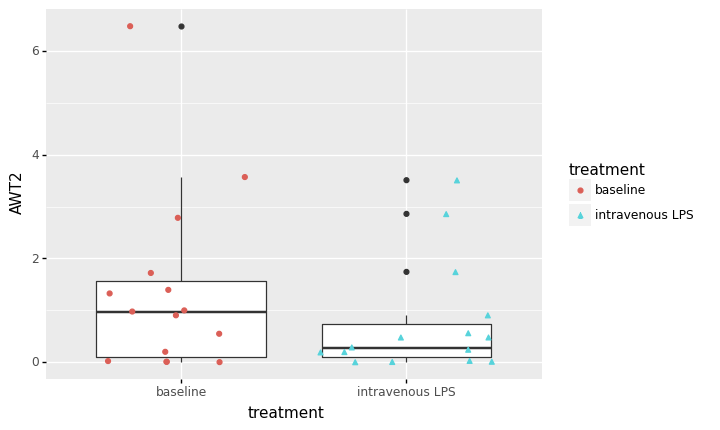

<ggplot: (325448340)>

In [167]:
from plotnine import *
ggplot(data, aes(x='treatment', y='AWT2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))

In [168]:
a = 0.05

wilcoxon(data_control["AWT2"],data_treatment["AWT2"])


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.


WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)

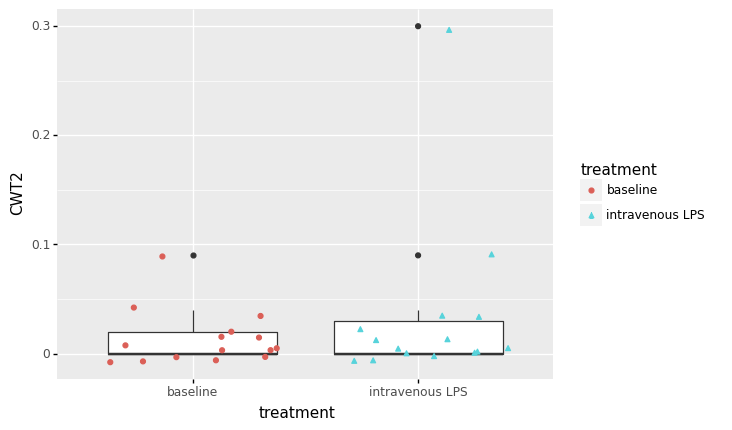

<ggplot: (325870053)>

In [169]:
ggplot(data, aes(x='treatment', y='CWT2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [170]:
a = 0.05

wilcoxon(data_control["CWT2"],data_treatment["CWT2"])


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=19.0, pvalue=0.6729404357300602)

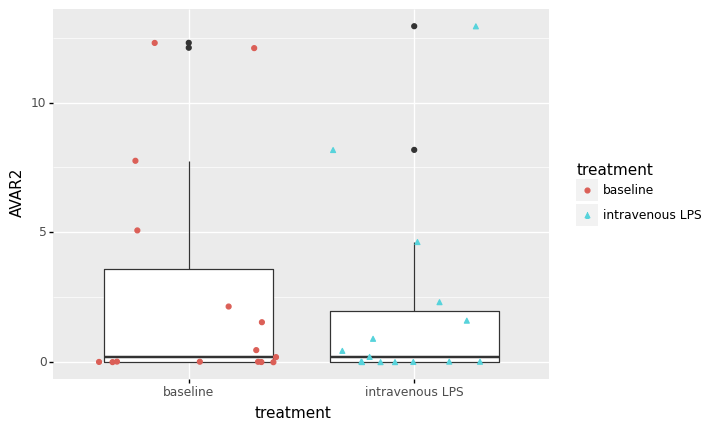

<ggplot: (325746893)>

In [171]:
ggplot(data, aes(x='treatment', y='AVAR2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [172]:
a = 0.05

wilcoxon(data_control["AVAR2"],data_treatment["AVAR2"])


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=7.0, pvalue=0.23672357063785732)

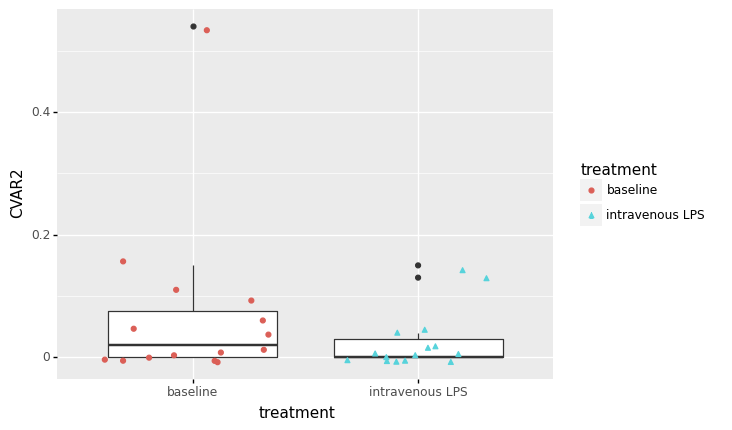

<ggplot: (325687631)>

In [173]:
ggplot(data, aes(x='treatment', y='CVAR2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [174]:
a = 0.05

wilcoxon(data_control["CVAR2"],data_treatment["CVAR2"])


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=10.0, pvalue=0.26144605232963014)

In [175]:
data_plot = data_treatment
controlData = data_control['total2']
controlData
data_plot["ctrl_total2"]=controlData.to_list()
data_plot["ctrl_totalC"]=data_control['totalC'].to_list()
data_plot["ctrl_totalA"]=data_control['totalA'].to_list()


data_plot

<ipython-input-175-3e0b5f744490>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-175-3e0b5f744490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-175-3e0b5f744490>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sheet #,Run,BioSample,Bases,Bytes,Experiment,GEO_Accession,inflammatory_response,race,Sample Name,...,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar,ctrl_total2,ctrl_totalC,ctrl_totalA
15,16,SRR4292097,SAMN05806826,56.30 G,34.32 Gb,SRX2187591,GSM2326902,1,African American,GSM2326902,...,0.00,0.00,-8.22,-7.70,-0.52,0.00,-8.22,12.85,0.54,12.31
16,17,SRR4292098,SAMN05806825,55.41 G,33.89 Gb,SRX2187592,GSM2326903,1,Caucasian,GSM2326903,...,0.00,0.00,0.74,0.83,-0.09,0.00,0.74,12.21,0.09,12.12
17,18,SRR4292099,SAMN05806824,47.95 G,29.16 Gb,SRX2187593,GSM2326904,1,Caucasian,GSM2326904,...,-2.97,0.30,-2.67,-2.97,0.30,-2.67,0.00,6.48,0.00,6.48
18,19,SRR4292100,SAMN05806823,47.04 G,28.94 Gb,SRX2187594,GSM2326905,1,Caucasian,GSM2326905,...,0.00,0.00,0.48,0.41,0.07,0.00,0.48,7.85,0.06,7.79
19,20,SRR4292101,SAMN05806822,25.25 G,16.33 Gb,SRX2187595,GSM2326906,1,Caucasian,GSM2326906,...,-1.83,0.09,-1.74,-1.83,0.09,-1.74,0.00,3.57,0.00,3.57
20,21,SRR4292102,SAMN05806821,27.70 G,17.89 Gb,SRX2187596,GSM2326907,1,African American,GSM2326907,...,-0.93,0.02,-1.58,-1.58,0.00,-0.91,-0.67,2.99,0.06,2.93
21,22,SRR4292103,SAMN05806820,17.58 G,11.40 Gb,SRX2187597,GSM2326908,-1,Caucasian,GSM2326908,...,0.00,0.00,-2.85,-2.74,-0.11,0.00,-2.85,5.21,0.15,5.06
22,23,SRR4292104,SAMN05806819,25.12 G,16.21 Gb,SRX2187598,GSM2326909,-1,Caucasian,GSM2326909,...,-0.82,-0.02,-1.27,-1.36,0.09,-0.84,-0.43,3.93,0.08,3.85
23,24,SRR4292105,SAMN05806818,26.42 G,17.05 Gb,SRX2187599,GSM2326910,-1,Caucasian,GSM2326910,...,0.08,-0.07,0.01,0.08,-0.07,0.01,0.00,2.87,0.09,2.78
24,25,SRR4292106,SAMN05806817,9.88 G,5.85 Gb,SRX2187600,GSM2326911,1,Caucasian,GSM2326911,...,-0.62,0.02,-0.71,-0.62,-0.09,-0.60,-0.11,1.20,0.11,1.09


# Var


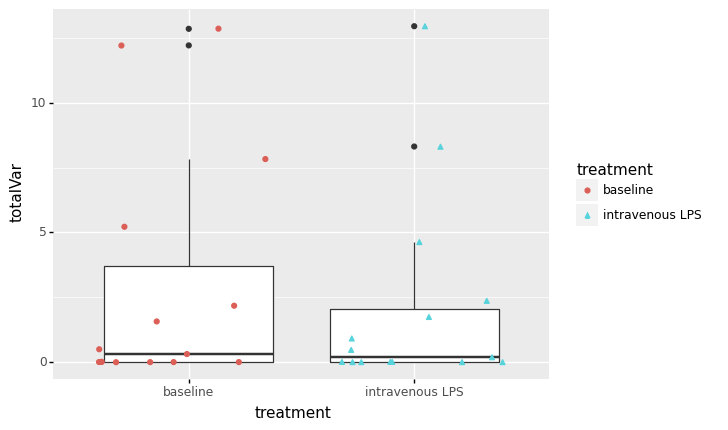

<ggplot: (326037977)>

In [ ]:
ggplot(data, aes(x='treatment', y='totalVar') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [ ]:
a = 0.05

wilcoxon(diff_data["diff_totalVar"])


WilcoxonResult(statistic=10.0, pvalue=0.2626182904425206)

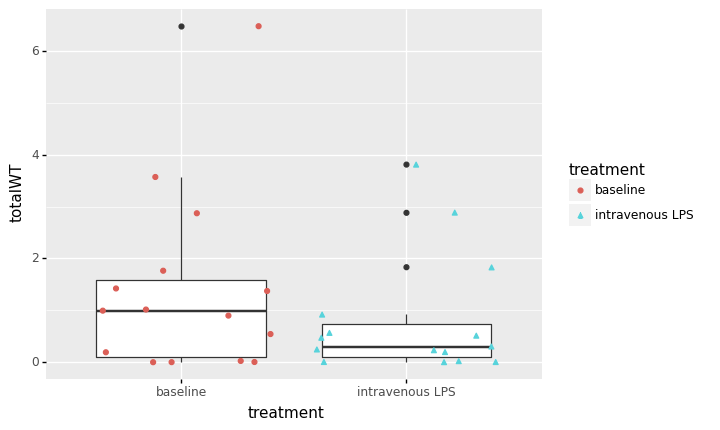

<ggplot: (325879056)>

In [ ]:
ggplot(data, aes(x='treatment', y='totalWT') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [ ]:
a = 0.05

wilcoxon(diff_data["diff_totalWT"])


WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)

# Total2

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_jitter : Removed 5 rows containing missing values.


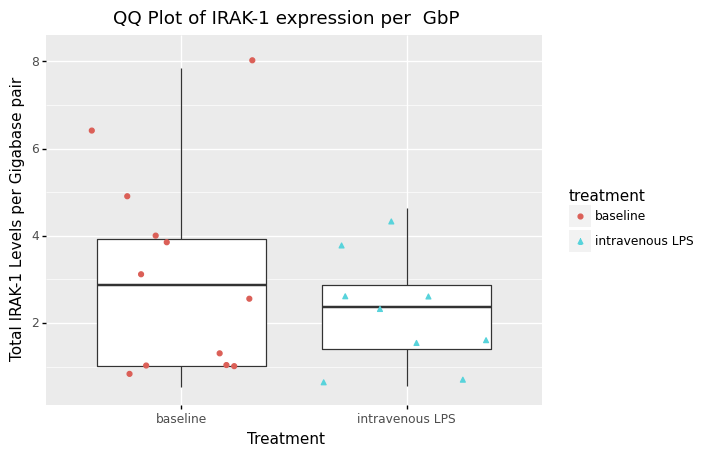

<ggplot: (325666856)>

In [176]:
removed_outliers = data.total2.between(data.total2.quantile(.05), data.total2.quantile(.95))
data_total= data[removed_outliers]
ggplot(data_total, aes(x='treatment',y="total2" ), ) + geom_boxplot(outlier_shape = "") + geom_jitter(data_total,aes(y="total2",colour='treatment',shape='treatment') )  + ggtitle("QQ Plot of IRAK-1 expression per  GbP") + xlab("Treatment") + ylab("Total IRAK-1 Levels per Gigabase pair") + ylim(data_total.total2.quantile(.05), data_total.total2.quantile(.95))

In [177]:
a = 0.05

wilcoxon(diff_data["diff_total2"])


WilcoxonResult(statistic=13.0, pvalue=0.00537109375)

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


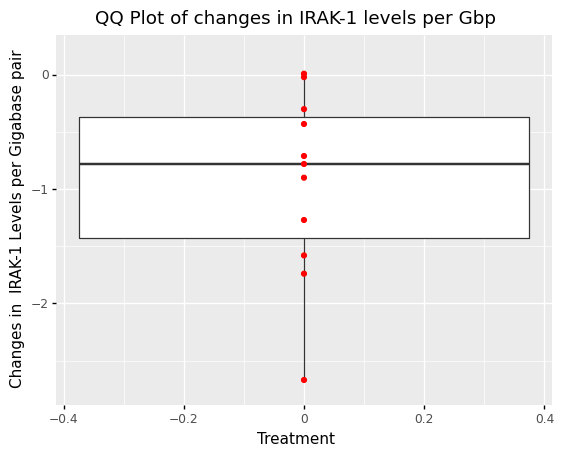

<ggplot: (325695787)>

In [178]:
removed_outliers_diffData = diff_data.diff_total2.between(diff_data.diff_total2.quantile(.05), diff_data.diff_total2.quantile(.95))
difftotalData=diff_data[removed_outliers_diffData]
ggplot(difftotalData, aes( x='0',y='diff_total2') ) + geom_boxplot() + geom_point(color="red") + ylim(difftotalData.diff_total2.quantile(.05), difftotalData.diff_total2.quantile(.95)) + ggtitle("QQ Plot of changes in IRAK-1 levels per Gbp") + xlab("Treatment") + ylab("Changes in  IRAK-1 Levels per Gigabase pair") 


In [179]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(data_plot.total2.to_numpy().reshape((-1, 1)), data_plot.ctrl_total2)
r_sq= model.score(data_plot.total2.to_numpy().reshape((-1, 1)), data_plot.ctrl_total2)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7102999411988566
intercept: 1.470657110816588
slope: [0.95817383]


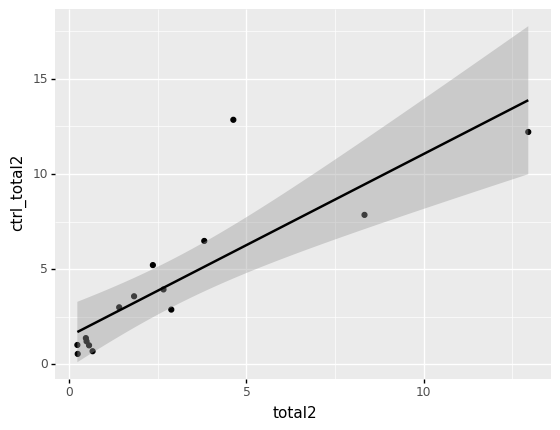

<ggplot: (325661413)>

In [180]:

ggplot(data_plot,aes(x='total2',y='ctrl_total2') )  + geom_point() + geom_smooth(method='lm')


# A

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


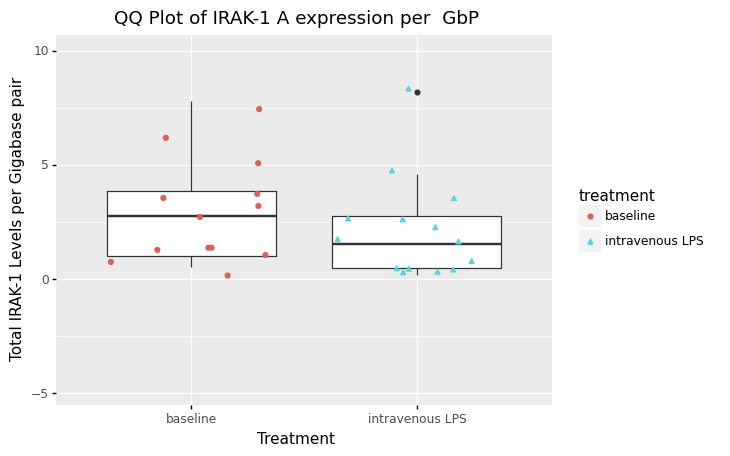

<ggplot: (325771255)>

In [185]:
removed_outliers_A = data.totalA.between(data.totalA.quantile(.05), data.totalA.quantile(.95))
data_total_A= data[removed_outliers_A]
q1 = np.round(data.totalA.quantile(0.25), 4)
q3 = np.round(data.totalA.quantile(0.75), 4)
iqr = np.round(q3 - q1, 4)
lowerA = np.round( q1 - (1.5 * iqr),4)
upperA=  np.round( q3+  (1.5 * iqr),4)
    # Interquartile range
lowerA= lower
ggplot(data, aes(x='treatment', y='totalA') ) + geom_boxplot() + geom_jitter(data, aes(colour='treatment',shape='treatment')) +  ggtitle("QQ Plot of IRAK-1 A expression per  GbP") + xlab("Treatment") + ylab("Total IRAK-1 Levels per Gigabase pair") + ylim(lowerA,upperA)


In [186]:
a = 0.05

wilcoxon(diff_data["diff_totalA"])


WilcoxonResult(statistic=14.0, pvalue=0.0067138671875)

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


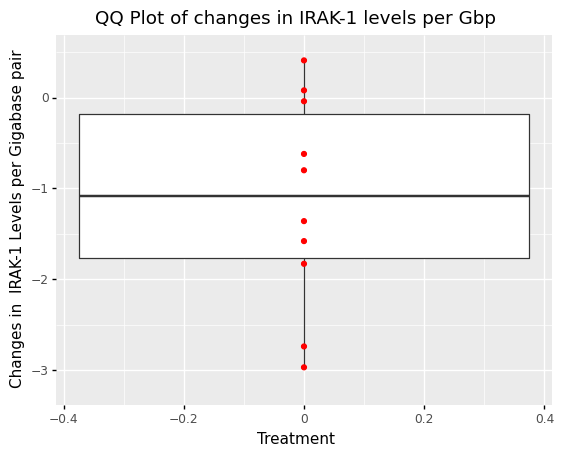

<ggplot: (326063704)>

In [213]:
ggplot(diff_data, aes( x='0',y='diff_totalA') ) + geom_boxplot() + geom_point(color="red")+ ggtitle("QQ Plot of changes in IRAK-1 levels per Gbp") + xlab("Treatment") + ylab("Changes in  IRAK-1 Levels per Gigabase pair") +ylim(-3.2,0.5)


In [188]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(data_plot.totalA.to_numpy().reshape((-1, 1)), data_plot.ctrl_totalA)
r_sq= model.score(data_plot.totalA.to_numpy().reshape((-1, 1)), data_plot.ctrl_totalA)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7250554835920754
intercept: 1.4674388913772396
slope: [0.95017418]


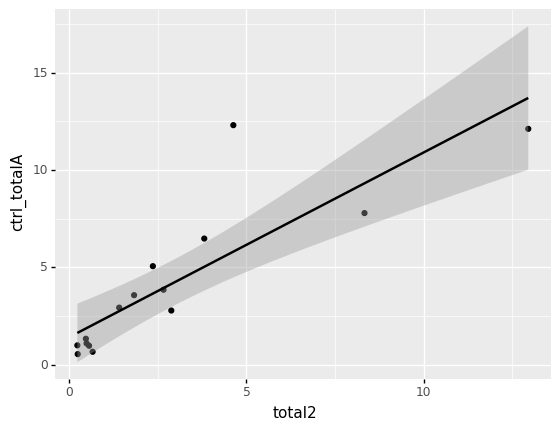

<ggplot: (325615373)>

In [189]:

ggplot(data_plot,aes(x='total2',y='ctrl_totalA') )  + geom_point() + geom_smooth(method='lm')


# C

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_jitter : Removed 19 rows containing missing values.


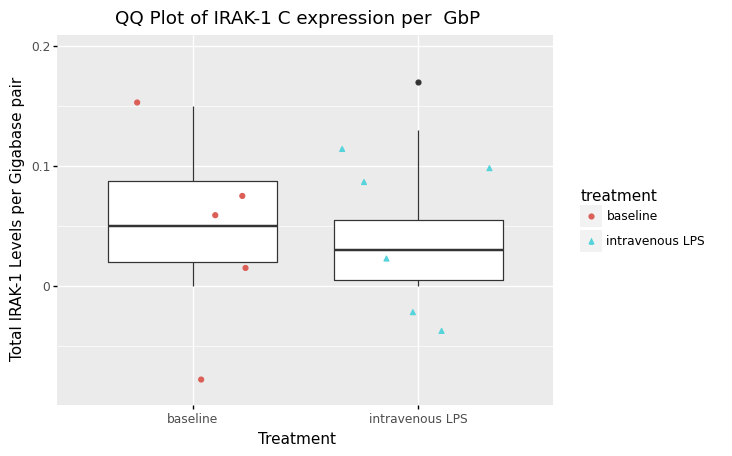

<ggplot: (325773650)>

In [190]:
removed_outliers_C = data.totalA.between(data.totalC.quantile(.05), data.totalC.quantile(.95))
data_total_C= data[removed_outliers_C]

q1 = np.round(data.totalC.quantile(0.25), 4)
q3 = np.round(data.totalC.quantile(0.75), 4)
iqr = np.round(q3 - q1, 4)
lower = np.round( q1 - (1.5 * iqr),4)
upper =  np.round( q3+  (1.5 * iqr),4)
    # Interquartile range
ggplot(data, aes(x='treatment', y='totalC') ) + geom_boxplot() + geom_jitter(data, aes(colour='treatment',shape='treatment')) +  ggtitle("QQ Plot of IRAK-1 C expression per  GbP") + xlab("Treatment") + ylab("Total IRAK-1 Levels per Gigabase pair") + ylim(lower,upper)


In [191]:
a = 0.05

wilcoxon(diff_data["diff_totalC"])


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.


WilcoxonResult(statistic=40.0, pvalue=0.7000053872020358)

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


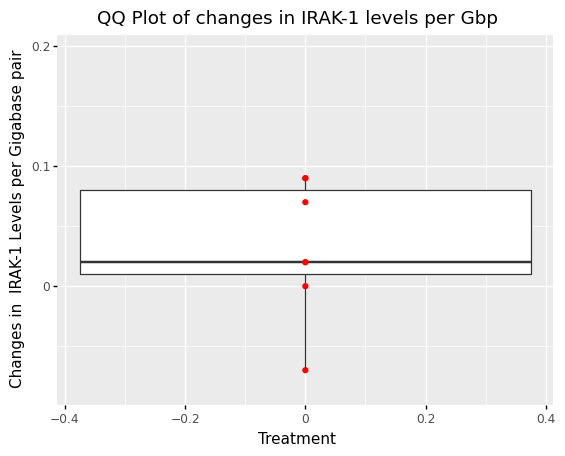

<ggplot: (325634407)>

In [216]:

ggplot(diff_data, aes( x='0',y='diff_totalC') ) + geom_boxplot() + geom_point(color="red")+ ggtitle("QQ Plot of changes in IRAK-1 levels per Gbp") + xlab("Treatment") + ylab("Changes in  IRAK-1 Levels per Gigabase pair") +ylim(lower,upper)


In [217]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(data_plot.totalC.to_numpy().reshape((-1, 1)), data_plot.ctrl_totalC)
r_sq= model.score(data_plot.totalC.to_numpy().reshape((-1, 1)), data_plot.ctrl_totalC)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.04270400002425967
intercept: 0.10600862548692266
slope: [-0.33347245]


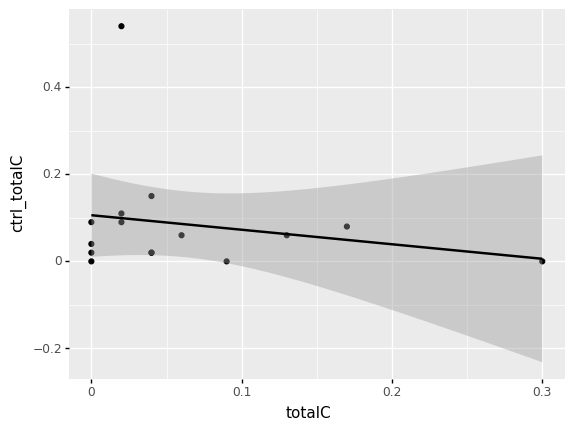

<ggplot: (324143041)>

In [194]:

ggplot(data_plot,aes(x='totalC',y='ctrl_totalC') )  + geom_point() + geom_smooth(method='lm')


## Statistics

### Total 2 Comparison

#### Wilcoxon non-parametric

In [195]:
a = 0.05

w, p = wilcoxon(data_control["total2"],data_treatment["total2"])
print(w, p)

13.0 0.00537109375


In [196]:
if (p < a):
    print("As P"+str(p)+" is less than a: "+str(a))
    print( "we reject the Null Hypothesis.")
    print(". There is significant difference betwween the groups")
else: 
    print("As P"+p+" is larger than a: "+str(a))
    print( "we FAIL TO reject the Null Hypothesis.")
    print(". There is NOT a significant difference betwween the groups")

As P0.00537109375 is less than a: 0.05
we reject the Null Hypothesis.
. There is significant difference betwween the groups


#### Freidman's Anova

In [197]:
sp.posthoc_nemenyi_friedman(diff_data)

,diff_AVAR2,diff_CVAR2,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar
diff_AVAR2,1.000000,0.900000,0.617954,0.900000,0.147481,0.200657,0.900000,0.658408,0.900000
diff_CVAR2,0.900000,1.000000,0.496456,0.900000,0.088304,0.125003,0.900000,0.537046,0.900000
diff_AWT2,0.617954,0.496456,1.000000,0.231812,0.900000,0.900000,0.408266,0.900000,0.820225
diff_CWT2,0.900000,0.900000,0.231812,1.000000,0.024224,0.037136,0.900000,0.265706,0.900000
diff_total2,0.147481,0.088304,0.900000,0.024224,1.000000,0.900000,0.061258,0.900000,0.302633
diff_totalA,0.200657,0.125003,0.900000,0.037136,0.900000,1.000000,0.088304,0.900000,0.385873
diff_totalC,0.900000,0.900000,0.408266,0.900000,0.061258,0.088304,1.000000,0.453088,0.900000
diff_totalWT,0.658408,0.537046,0.900000,0.265706,0.900000,0.900000,0.453088,1.000000,0.860680
diff_totalVar,0.900000,0.900000,0.820225,0.900000,0.302633,0.385873,0.900000,0.860680,1.000000


Friedman Tes 

### other

In [198]:
a = 0.05

w, p = wilcoxon((data_control["totalA"]/data_control["totalC"] ),(data_treatment["totalA"]/data_treatment["totalC"]))
print(w, p)

48.0 0.52447509765625


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:2956: RuntimeWarning: invalid value encountered in subtract


In [199]:
a = 0.05

w, p = wilcoxon((data_control["AVAR2"]/data_control["CVAR2"] ),(data_treatment["AVAR2"]/data_treatment["CVAR2"]))
print(w, p)

11.0 0.00335693359375


In [200]:
a = 0.05

w, p = wilcoxon((data_control["AWT2"]/data_control["CWT2"] ),(data_treatment["AWT2"]/data_treatment["CWT2"]))
print(w, p)

19.0 0.05535888671875


/usr/local/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


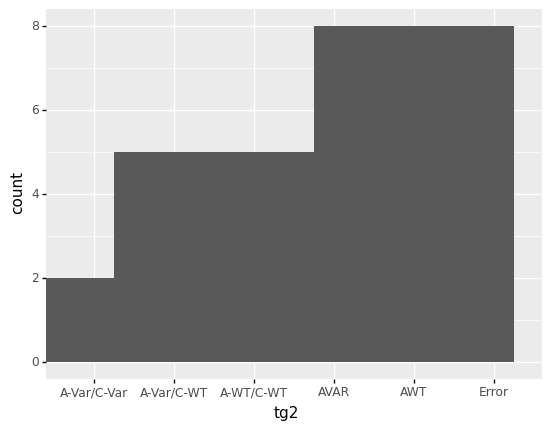

<ggplot: (322441141)>

In [201]:
ggplot()+geom_histogram(procData,aes(x="tg2"))

/usr/local/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


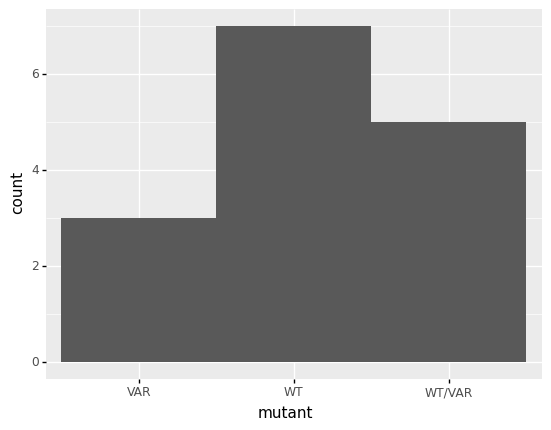

<ggplot: (324301147)>

In [202]:
ggplot()+geom_histogram(procData,aes(x="mutant"))

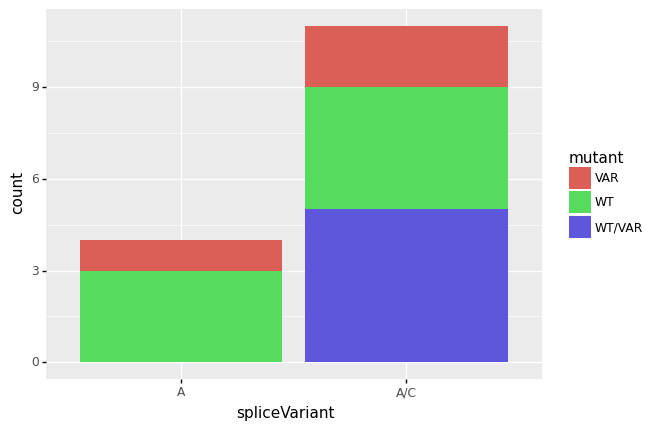

<ggplot: (322086991)>

In [203]:
ggplot()+geom_bar(procData,aes(x="spliceVariant",fill="mutant"))

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_col : Removed 9 rows containing missing values.


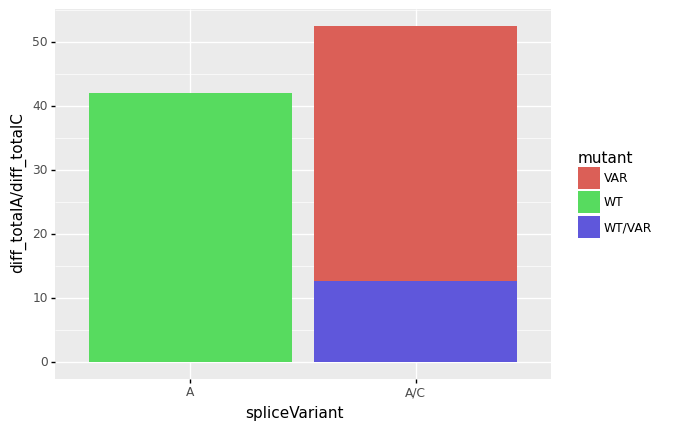

<ggplot: (324876216)>

In [204]:
ggplot()+geom_col(procData,aes(x="spliceVariant",y="diff_totalA/diff_totalC",fill="mutant"))

<ipython-input-205-7ecc4e451223>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


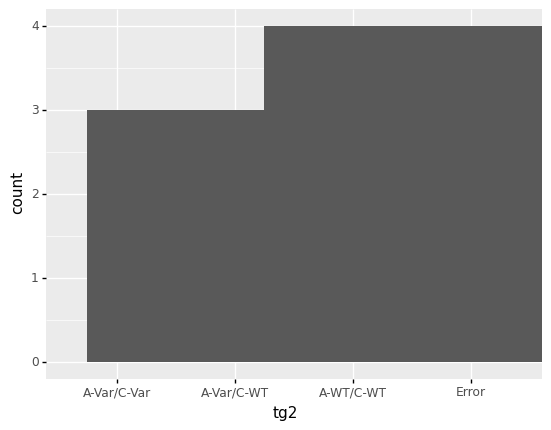

<ggplot: (322441075)>

In [205]:
a = 0.05
diff_data = procData[(data["totalC"] > 0 ) & (data["totalA"] > 0 )]
ggplot()+geom_histogram(diff_data,aes(x="tg2"))

In [206]:

w, p = wilcoxon((diff_data["totalC"] )/(diff_data["totalA"]))
print(w, p)

0.0 0.0009765625


In [207]:
a = 0.05

w, p = wilcoxon(data_control["total2"],data_treatment["total2"])
print(w, p)

13.0 0.00537109375


2 graphs 

1. Do the Table
3. Black and white
3. Make sure its not sloppy
4. 

control, LPS & Difference.

correlation plot for each patient - total 2 & diff_total2

Look for A/C ratios 

ggplot(data_plot,aes(x='total2',y='ctrl_total2') )  + geom_point(colour) + geom_smooth(method='lm')
